In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Generating bootstrap replicates

In [16]:
# Resampling engine

bs_sample = np.random.choice([1,2,3,4,5], size = 100)

In [17]:
np.mean(bs_sample)

2.87

#### Generate bootstrap by loop

In [33]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/470/datasets/129cba08c45749a82701fbe02180c5b69eb9adaf/sheffield_weather_station.csv', skiprows=8, delim_whitespace=True)

In [39]:
rainfall = np.array(df['rain'])

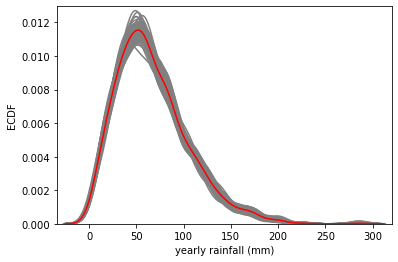

In [59]:
# generate N sample
for i in range(100):
    bs_sample = np.random.choice(rainfall, size = len(rainfall))
    
    ax = sns.kdeplot(bs_sample, color = 'grey', alpha =0.1)


ax = sns.kdeplot(rainfall, color = 'r')
plt.margins(0.02)
ax = plt.xlabel('yearly rainfall (mm)')
ax = plt.ylabel('ECDF')
plt.show()

### Bootstrap confidence intervals

In [60]:
# make function to calculate bootstrap parameter

# mean
def bootstrap_mean(data):
    bs_sample = np.random.choice(data, len(data))
    return np.mean(bs_sample)

In [62]:
np.mean(rainfall)

66.75024968789013

In [61]:
bootstrap_mean(rainfall)

67.19375780274656

In [68]:
# many bootstrap mean parameter using loop

bs_mean_array = np.empty(1000)

for i in range(1000):
    bs_mean_array[i] = bootstrap_mean(rainfall)
    
np.mean(bs_mean_array)

66.7466299625468

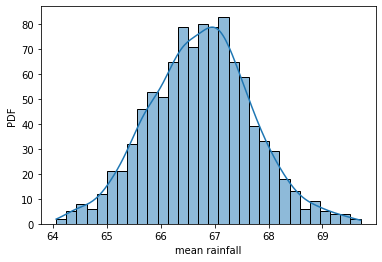

In [82]:
sns.histplot(bs_mean_array, bins = 30, kde = True)
plt.xlabel('mean rainfall')
plt.ylabel('PDF')
plt.show();

####  95% confident interval  of  bootstrap mean

In [79]:
conf_int = np.percentile(bs_mean_array, [2.5, 97.5])
conf_int

array([64.85697566, 68.72797753])

### Pairs bootstrap

In [ ]:
# sample the indices

ind = np.arange(len(x)) # generate index
bs_ind = np.random.choice(ind, len(ind)) #random choice index

bs_x = x[bs_ind] # bootstrap x
bs_y = y[bs_ind] # bootstrap y


# calculate bootstrap slope and intercept

bs_slope, bs_intercept = np.polyfit(bs_x, bs_y, 1)